<a href="https://colab.research.google.com/github/TimurRakhmat/ML/blob/main/lab45.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Лабораторная работа № 4-5

Группа М8О-109СВ-24

Рахматуллин Тимур Сергеевич

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.mixture import GaussianMixture
from sklearn.neighbors import KernelDensity

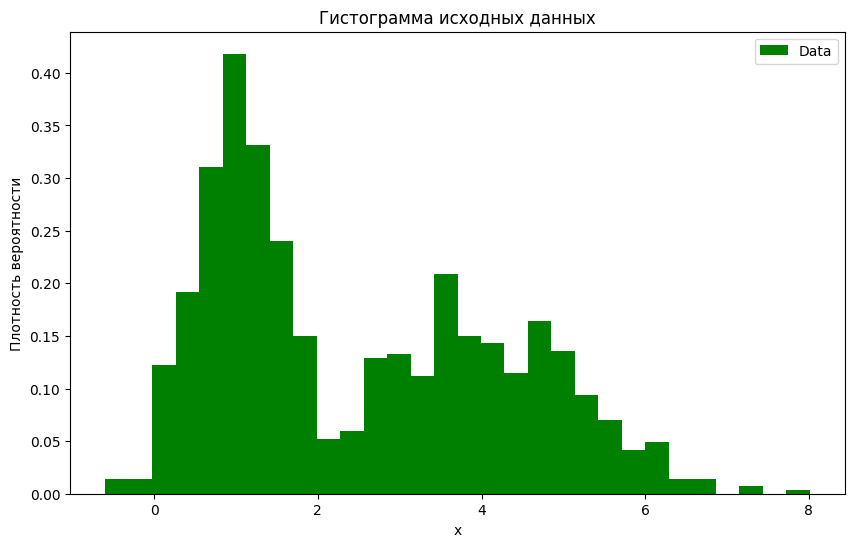

In [8]:
np.random.seed(666)

data1 = np.random.normal(1, 0.5, 500)
data2 = np.random.normal(4, 1.2, 500)
data = np.concatenate([data1, data2])

x = np.linspace(-3, 8, 1000).reshape(-1, 1)
plt.figure(figsize=(10, 6))
plt.hist(data, bins=30, density=True, color='g', label='Data')
plt.title('Гистограмма исходных данных')
plt.xlabel('x')
plt.ylabel('Плотность вероятности')
plt.legend()
plt.show()

EM-алгоритм

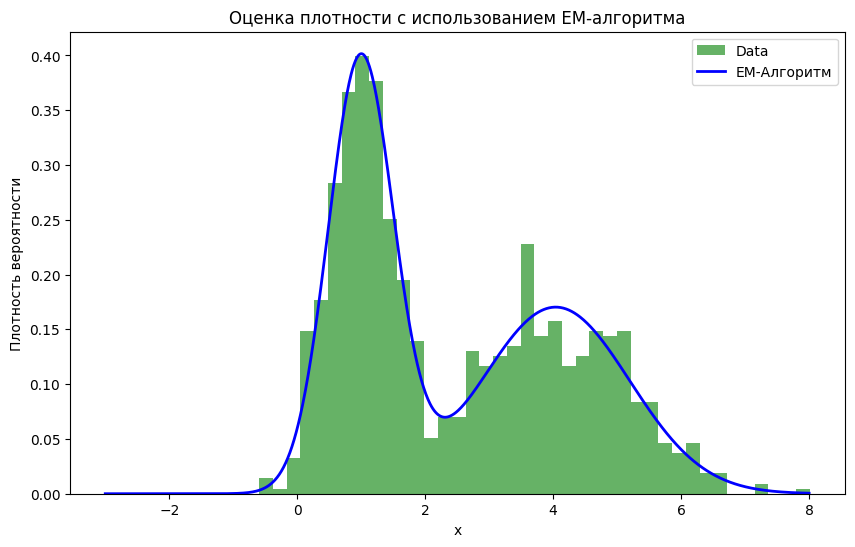

In [11]:
gmm = GaussianMixture(n_components=2, covariance_type='full')
gmm.fit(data.reshape(-1, 1))
x = np.linspace(-3, 8, 1000).reshape(-1, 1)
gmm_pdf = np.exp(gmm.score_samples(x))

plt.figure(figsize=(10, 6))
plt.hist(data, bins=40, density=True, alpha=0.6, color='g', label='Data')
plt.plot(x, gmm_pdf, label='EM-Алгоритм', color='b', lw=2)
plt.title('Оценка плотности с использованием EM-алгоритма')
plt.xlabel('x')
plt.ylabel('Плотность вероятности')
plt.legend()
plt.show()

Ядерное сглаживание

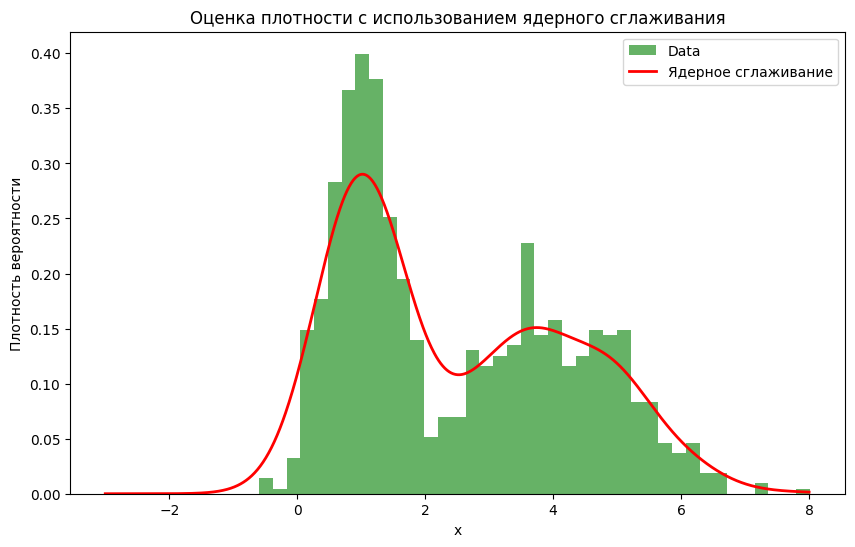

In [12]:
kde = KernelDensity(kernel='gaussian', bandwidth=0.5)
kde.fit(data.reshape(-1, 1))
kde_pdf = np.exp(kde.score_samples(x))

plt.figure(figsize=(10, 6))
plt.hist(data, bins=40, density=True, alpha=0.6, color='g', label='Data')
plt.plot(x, kde_pdf, label='Ядерное сглаживание', color='r', lw=2)
plt.title('Оценка плотности с использованием ядерного сглаживания')
plt.xlabel('x')
plt.ylabel('Плотность вероятности')
plt.legend()
plt.show()

Метод Метрополиса-Гастинга и Метод Гиббса

In [31]:
def metropolis_hastings(kde, data, n_samples=1000):
    x = [np.random.choice(data)]
    for _ in range(1, n_samples):
        x_new = np.random.normal(x[-1], 1)
        p_old = np.exp(kde.score_samples(np.array([[x[-1]]])))
        p_new = np.exp(kde.score_samples(np.array([[x_new]])))

        acceptance_ratio = min(1, p_new / p_old)
        if np.random.rand() < acceptance_ratio:
            x.append(x_new)
        else:
            x.append(x[-1])

    return np.array(x)

mh_samples = metropolis_hastings(kde, data)

In [32]:
def gibbs_sampling(data, conditional_distributions, n_samples=1000):
    samples = [data]
    current = np.array(data)
    for _ in range(n_samples - 1):
        for i, conditional in enumerate(conditional_distributions):
            current[i] = conditional(*current[:i], *current[i + 1:])
        samples.append(current.copy())
    return np.array(samples)

gibbs_samples = gibbs_sampling(
    [data.mean()],
    [lambda: np.random.choice(data)]
)

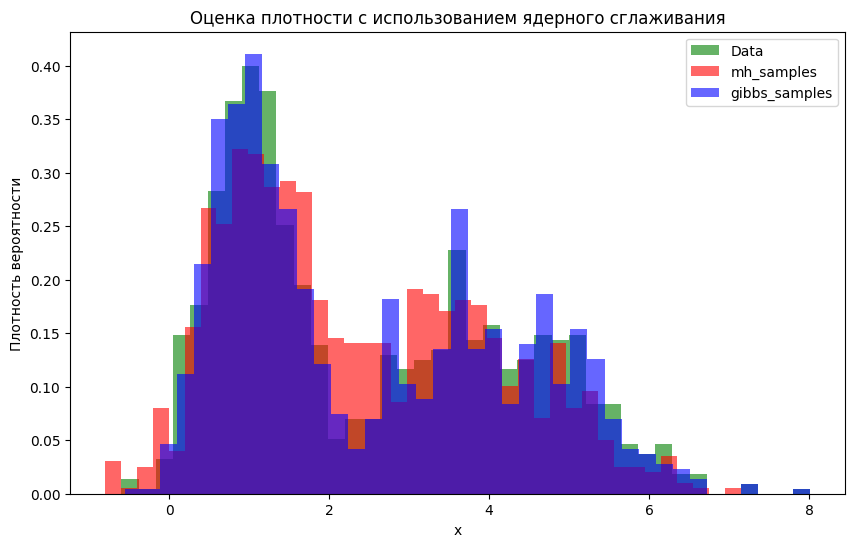

In [33]:
plt.figure(figsize=(10, 6))
plt.hist(data, bins=40, density=True, alpha=0.6, color='g', label='Data')
plt.hist(mh_samples, bins=40, density=True, alpha=0.6, color='r', label='mh_samples')
plt.hist(gibbs_samples, bins=40, density=True, alpha=0.6, color='b', label='gibbs_samples')
plt.title('Оценка плотности с использованием ядерного сглаживания')
plt.xlabel('x')
plt.ylabel('Плотность вероятности')
plt.legend()
plt.show()

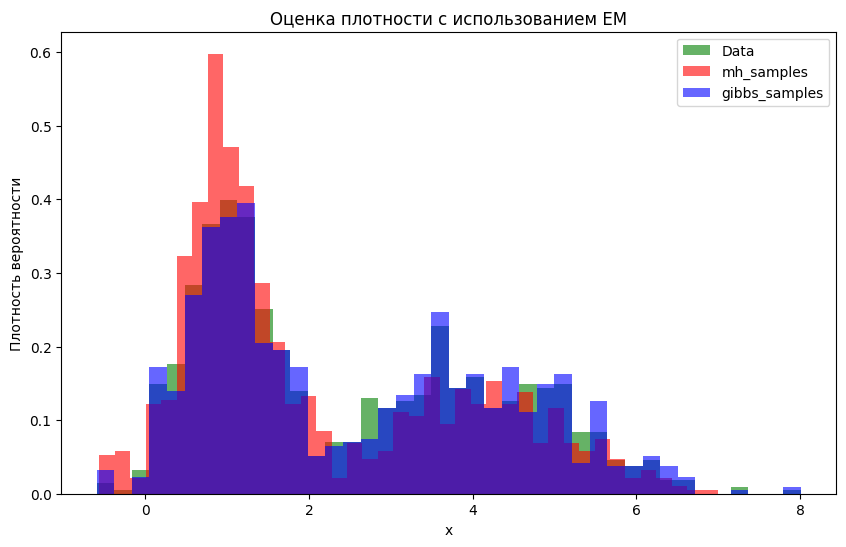

In [34]:
mh_samples = metropolis_hastings(gmm, data)
gibbs_samples = gibbs_sampling(
    [data.mean()],
    [lambda: np.random.choice(data)]
)
plt.figure(figsize=(10, 6))
plt.hist(data, bins=40, density=True, alpha=0.6, color='g', label='Data')
plt.hist(mh_samples, bins=40, density=True, alpha=0.6, color='r', label='mh_samples')
plt.hist(gibbs_samples, bins=40, density=True, alpha=0.6, color='b', label='gibbs_samples')
plt.title('Оценка плотности с использованием EM')
plt.xlabel('x')
plt.ylabel('Плотность вероятности')
plt.legend()
plt.show()

Сравнение сгенерированных точек с исходными

In [35]:
def kullback_leibler_divergence(p, q):
    return np.sum(p * np.log(p / q))
kde_data = KernelDensity(kernel='gaussian', bandwidth=0.5)
kde_data.fit(data.reshape(-1, 1))

p = np.exp(kde_data.score_samples(mh_samples.reshape(-1, 1)))
q = np.exp(kde_data.score_samples(data.reshape(-1, 1)))

kl_divergence = kullback_leibler_divergence(p, q)
print(f"Расстояние Кульбака-Лейблера между сгенерированными и исходными точками: {kl_divergence}")

Расстояние Кульбака-Лейблера между сгенерированными и исходными точками: 49.92981969344521
